Let us consider [Heart Disease Predictions](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset) from [Kaggle](https://www.kaggle.com/). 

Question: Can this dataset be used to build a prediction model that will accurately classify patient with heart disease or Attack? 

In [91]:
#for ignoring future pop up message
import warnings
warnings.filterwarnings('ignore')

In [92]:
import pandas as pd #for data importing and manupulation
import numpy as np  #for data manupulation and cleaning
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline 


In [93]:
#for statistical related operation
from scipy.stats import hmean, gmean

In [94]:
df= pd.read_csv(r'C:\Users\AdesinaA\Desktop\Heart.csv') #importing the dataset from my local computer to jupyter workspace

In [95]:
df.head() #checing the first 5 row of the dataset to have a glance of what the dataset really is.

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [96]:
df['HeartDiseaseorAttack'].value_counts() #checking the value of the target feature.

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [97]:
df.shape #checking the shape of the dataset.

(253680, 22)

In [98]:
df.info() #checking more info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [99]:

# converting all values from float to int
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].apply(np.int64)
df['HighBP'] = df['HighBP'].apply(np.int64)
df['HighChol'] = df['HighChol'].apply(np.int64)
df['CholCheck'] = df['CholCheck'].apply(np.int64)
df['BMI'] = df['BMI'].apply(np.int64)
df['Smoker'] = df['Smoker'].apply(np.int64)
df['Stroke'] = df['Stroke'].apply(np.int64)
df['Diabetes'] = df['Diabetes'].apply(np.int64)
df['PhysActivity'] = df['PhysActivity'].apply(np.int64)
df['Fruits'] = df['Fruits'].apply(np.int64)
df['Veggies'] = df['Veggies'].apply(np.int64)
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].apply(np.int64)
df['AnyHealthcare'] = df['AnyHealthcare'].apply(np.int64)
df['NoDocbcCost'] = df['NoDocbcCost'].apply(np.int64)
df['GenHlth'] = df['GenHlth'].apply(np.int64)
df['MentHlth'] = df['MentHlth'].apply(np.int64)
df['PhysHlth'] = df['PhysHlth'].apply(np.int64)
df['DiffWalk'] = df['DiffWalk'].apply(np.int64)
df['Sex'] = df['Sex'].apply(np.int64)
df['Age'] = df['Age'].apply(np.int64)
df['Education'] = df['Education'].apply(np.int64)
df['Income'] = df['Income'].apply(np.int64)

# displaying the datatypes
display(df.dtypes)


HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

<AxesSubplot:xlabel='HighBP', ylabel='count'>

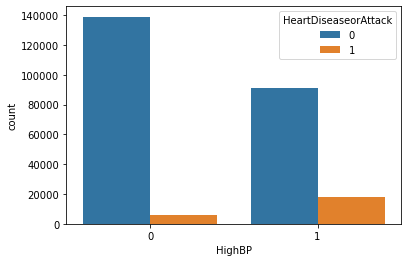

In [100]:
sns.countplot(df['HighBP'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of HighBP and HeartDiseaseorAttack

<AxesSubplot:xlabel='HighChol', ylabel='count'>

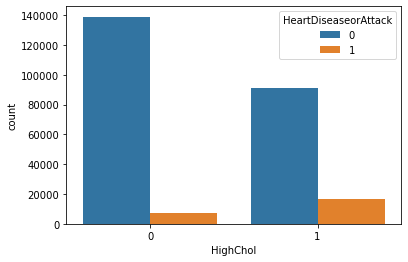

In [101]:
sns.countplot(df['HighChol'], hue='HeartDiseaseorAttack', data=df)#checking the visual correlation of HighChol and HeartDiseaseorAttack

<AxesSubplot:xlabel='CholCheck', ylabel='count'>

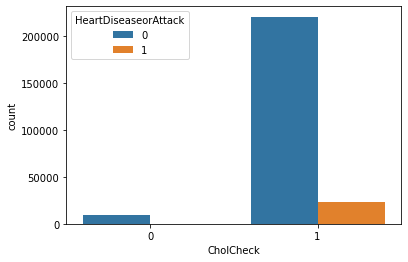

In [102]:
sns.countplot(df['CholCheck'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of CholCheck and HeartDiseaseorAttack

<AxesSubplot:xlabel='BMI', ylabel='count'>

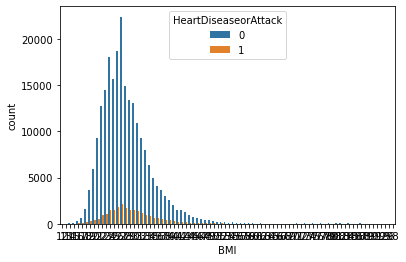

In [103]:
sns.countplot(df['BMI'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of BMI and HeartDiseaseorAttack

<AxesSubplot:xlabel='Smoker', ylabel='count'>

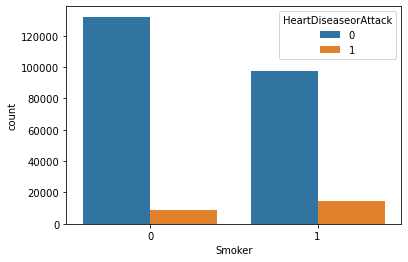

In [104]:
sns.countplot(df['Smoker'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Smoker and HeartDiseaseorAttack

<AxesSubplot:xlabel='Stroke', ylabel='count'>

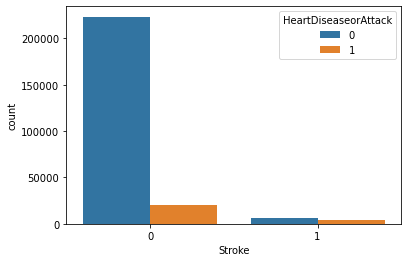

In [105]:
sns.countplot(df['Stroke'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Stroke and HeartDiseaseorAttack

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

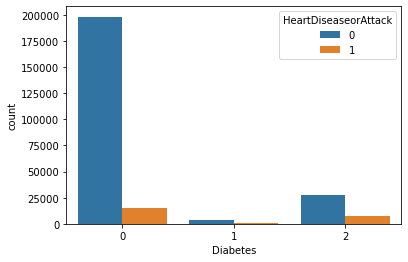

In [106]:
sns.countplot(df['Diabetes'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Diabetes and HeartDiseaseorAttack

<AxesSubplot:xlabel='PhysActivity', ylabel='count'>

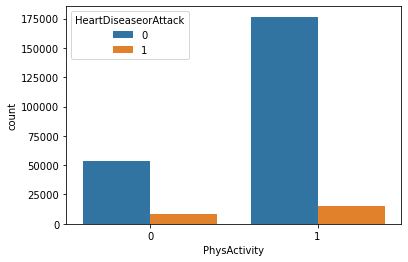

In [107]:
sns.countplot(df['PhysActivity'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of PhysActivity and HeartDiseaseorAttack

<AxesSubplot:xlabel='Fruits', ylabel='count'>

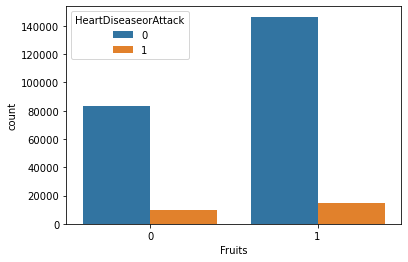

In [108]:
sns.countplot(df['Fruits'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Fruits and HeartDiseaseorAttack

<AxesSubplot:xlabel='Veggies', ylabel='count'>

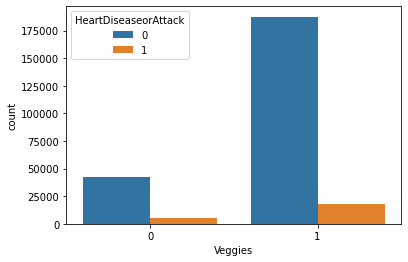

In [109]:
sns.countplot(df['Veggies'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Veggies and HeartDiseaseorAttack

<AxesSubplot:xlabel='HvyAlcoholConsump', ylabel='count'>

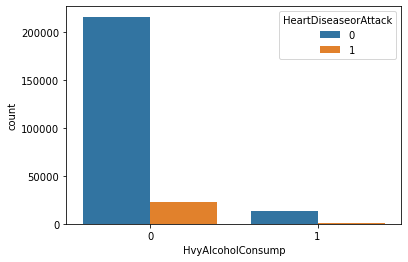

In [110]:
sns.countplot(df['HvyAlcoholConsump'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of HvyAlcoholConsump and HeartDiseaseorAttack

<AxesSubplot:xlabel='AnyHealthcare', ylabel='count'>

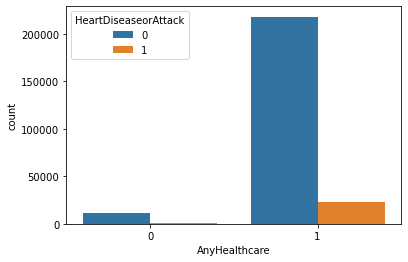

In [111]:
sns.countplot(df['AnyHealthcare'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of AnyHealthcare and HeartDiseaseorAttack

<AxesSubplot:xlabel='NoDocbcCost', ylabel='count'>

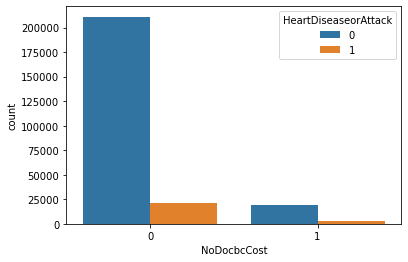

In [112]:
sns.countplot(df['NoDocbcCost'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of NoDocbcCost and HeartDiseaseorAttack

<AxesSubplot:xlabel='GenHlth', ylabel='count'>

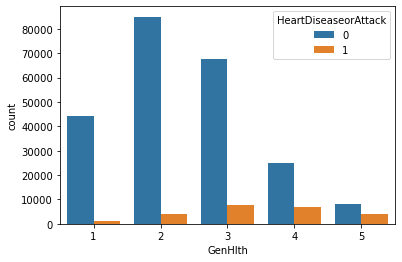

In [113]:
sns.countplot(df['GenHlth'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of GenHlth and HeartDiseaseorAttack

<AxesSubplot:xlabel='MentHlth', ylabel='count'>

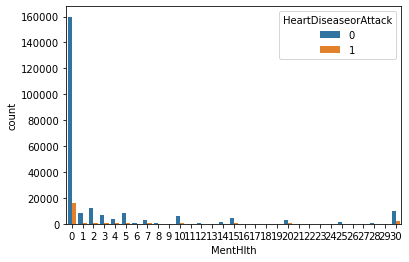

In [114]:
sns.countplot(df['MentHlth'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of MentHlth and HeartDiseaseorAttack

<AxesSubplot:xlabel='PhysHlth', ylabel='count'>

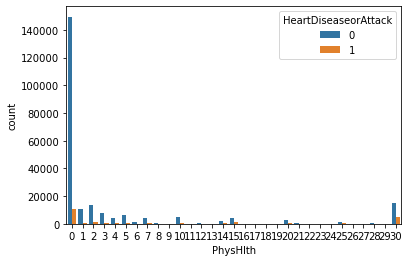

In [115]:
sns.countplot(df['PhysHlth'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of PhysHlth and HeartDiseaseorAttack

<AxesSubplot:xlabel='DiffWalk', ylabel='count'>

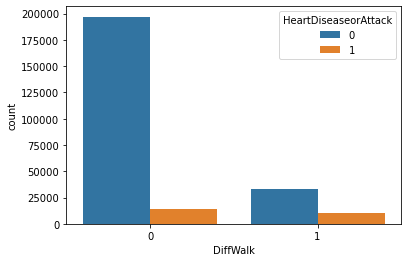

In [116]:
sns.countplot(df['DiffWalk'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of DiffWalk and HeartDiseaseorAttack

<AxesSubplot:xlabel='Sex', ylabel='count'>

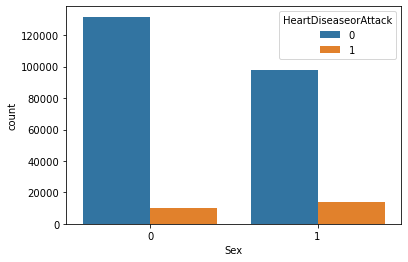

In [117]:
sns.countplot(df['Sex'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Sex and HeartDiseaseorAttack

<AxesSubplot:xlabel='Age', ylabel='count'>

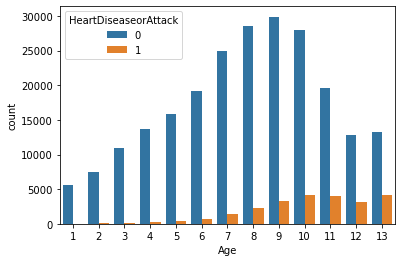

In [118]:
sns.countplot(df['Age'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Age and HeartDiseaseorAttack

<AxesSubplot:xlabel='Education', ylabel='count'>

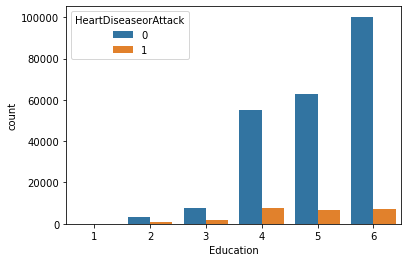

In [119]:
sns.countplot(df['Education'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Education and HeartDiseaseorAttack

<AxesSubplot:xlabel='Income', ylabel='count'>

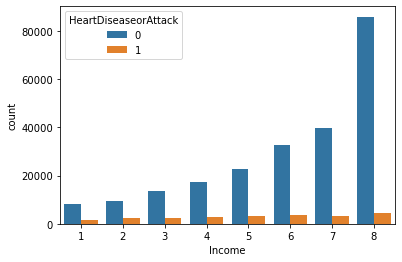

In [120]:
sns.countplot(df['Income'], hue='HeartDiseaseorAttack', data=df) #checking the visual correlation of Income and HeartDiseaseorAttack

In [121]:
df.describe() #checking the statistical value of the features.

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [122]:
#checking the missing values
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [79]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [80]:
#dropping features that are not important to the dataset
df.drop('Education', axis=1, inplace=True)
df.drop('Income', axis=1, inplace=True)

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [82]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [123]:
df = df.drop('Sex', axis=1) #dropping the target variable

In [124]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df.HeartDiseaseorAttack


In [125]:
# Split the data into 30% validation and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) #0.15 bank40

In [126]:
from sklearn.metrics import auc

In [127]:
model=CatBoostClassifier(n_estimators=800,eval_metric='AUC',max_depth=5,learning_rate=0.1,od_wait=50, 
                              subsample=0.9,bootstrap_type='Bernoulli',metric_period=20,
                     #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)

In [128]:
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	test: 0.7312476	best: 0.7312476 (0)	total: 69.1ms	remaining: 55.2s
20:	test: 0.8362987	best: 0.8362987 (20)	total: 1.63s	remaining: 1m
40:	test: 0.8391310	best: 0.8391310 (40)	total: 2.83s	remaining: 52.3s
60:	test: 0.8403399	best: 0.8403399 (60)	total: 4.1s	remaining: 49.6s
80:	test: 0.8407624	best: 0.8407624 (80)	total: 5.31s	remaining: 47.2s
100:	test: 0.8411090	best: 0.8411216 (98)	total: 6.74s	remaining: 46.6s
120:	test: 0.8414103	best: 0.8414183 (119)	total: 8.23s	remaining: 46.2s
140:	test: 0.8415193	best: 0.8415579 (137)	total: 9.53s	remaining: 44.5s
160:	test: 0.8416333	best: 0.8416351 (159)	total: 10.9s	remaining: 43.4s
180:	test: 0.8417334	best: 0.8417334 (180)	total: 12.4s	remaining: 42.4s
200:	test: 0.8417051	best: 0.8417543 (187)	total: 13.9s	remaining: 41.4s
220:	test: 0.8417731	best: 0.8417971 (218)	total: 15.1s	remaining: 39.7s
240:	test: 0.8418123	best: 0.8418347 (233)	total: 16.5s	remaining: 38.4s
260:	test: 0.8417572	best: 0.8418347 (233)	total: 17.8s	remaining: 

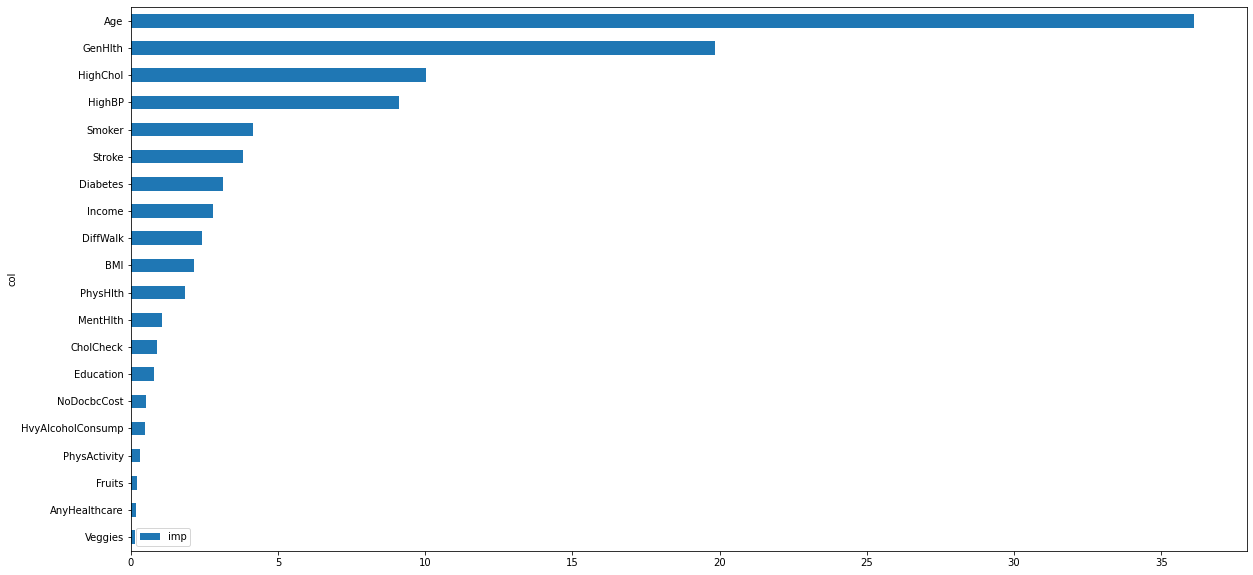

In [129]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')   